In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import ast
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [40]:
data=pd.read_csv('tmdb_5000_movies.csv')
print(data.head(2))
print(data.shape)
print(data.info())
n_movies=int(data.id.nunique())
print("No of movies:",n_movies)


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies 

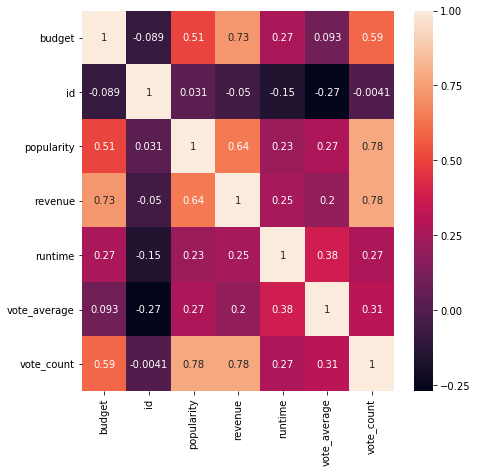

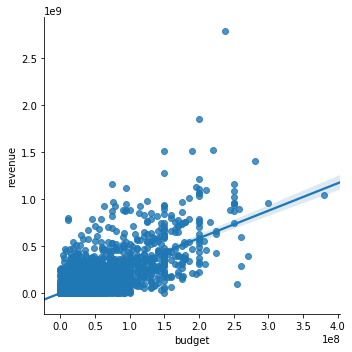

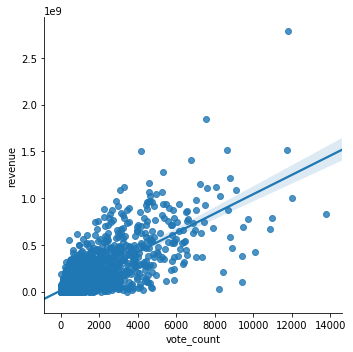

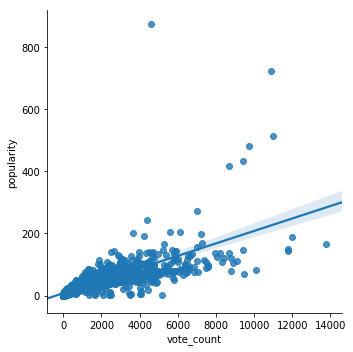

In [4]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(),annot=True)
plt.show()


sns.lmplot(x="budget",y="revenue",data=data)
plt.show()
sns.lmplot(x="vote_count",y="revenue",data=data)
plt.show()
sns.lmplot(x="vote_count",y="popularity",data=data)
plt.show()



C:\Users\Tanya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


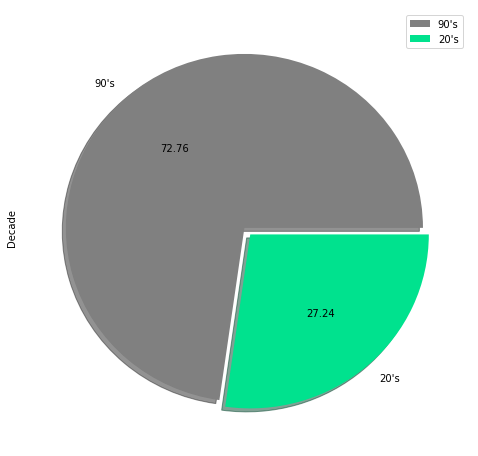

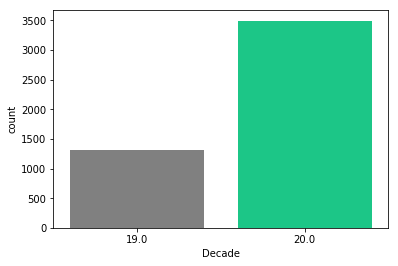

In [5]:
data["release_date"]=pd.to_datetime(data['release_date'])
data["Year"]=data["release_date"].dt.year
def decade():
    data["Year"]=(data["Year"]).fillna(0).astype(int)
    data["Decade"]=data["Year"]/100
    data["Decade"]=data["Decade"].astype(int)
decade()
data["Decade"][(data["Decade"]==0)]=np.nan
colors = ["#808080",'#00E28E']
label="90's","20's"
data['Decade'].value_counts().plot.pie(labels=label,subplots=True, figsize=(8, 8), autopct='%.2f',explode=(0,0.05),colors=colors,shadow=True)
plt.legend(labels=label,loc="best")
plt.show()
sns.countplot('Decade',data=data,palette=colors)
plt.show()


In [7]:
def get_values(st):
    v=[]
    data_str = ast.literal_eval(st)
    if isinstance(data_str,list):
        for k_v in data_str:
            v.append(k_v['name'])
        return v
data[['genres', 'production_companies', 'production_countries', 'spoken_languages']] = data[['genres', 'production_companies', 'production_countries', 'spoken_languages']].applymap(get_values)
print(data.head())
def counting_values(data,columns):
    v={}
    for row in data[columns].dropna():
        if len(row)>0:
            for k in row:
                if k in v:
                    v[k]+=1
                else:
                    v[k]=1
        else:
            pass
    return v

data['Genre'] = data.genres.apply(', '.join)
print(data.head())


      budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, 

Action             1154
Adventure           790
Animation           234
Comedy             1722
Crime               696
Documentary         110
Drama              2297
Family              513
Fantasy             424
Foreign              34
History             197
Horror              519
Music               185
Mystery             348
Romance             894
Science Fiction     535
TV Movie              8
Thriller           1274
War                 144
Western              82
dtype: int64


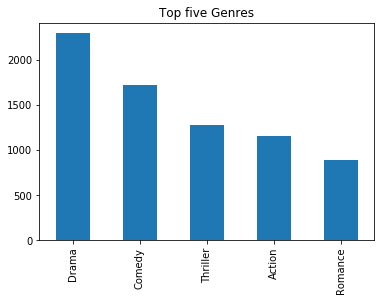

In [8]:
g_count=pd.Series(counting_values(data,"genres"))
print(g_count)
g_count.sort_values(ascending=False).head(5).plot(kind="bar")
plt.title("Top five Genres")
plt.show()


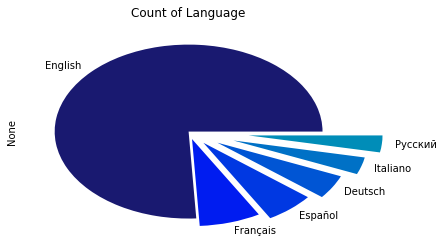

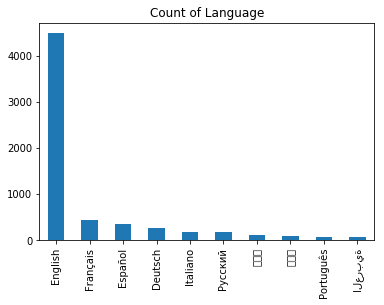

In [9]:
g_count=pd.Series(counting_values(data,"spoken_languages"))
g_count.sort_values(ascending=False).head(6).plot(kind="pie",explode=(0,0.09,0.17,0.25,0.35,0.45),colors=['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8'])
plt.title("Count of Language")
plt.show()

g_count.sort_values(ascending=False).head(10).plot(kind="bar")                
plt.title("Count of Languages")
plt.show()


In [41]:
#Popularity Based 
C=data['vote_average'].mean()
#print(C)
#Minimum number of votes required in chart.
m=data['vote_count'].quantile(0.90)
#print(m)
d=data.copy().loc[data['vote_count']>=m]
#print(d.shape)
#Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
d['score'] = d.apply(weighted_rating, axis=1)
#Sort movies based on score calculated above
d = d.sort_values('score', ascending=False)

#Print the top 15 movies
print("Top 15 Movies")
print(d[['title', 'vote_count', 'vote_average', 'score']].head(15))


Top 15 Movies
                                                  title  vote_count  \
1881                           The Shawshank Redemption        8205   
662                                          Fight Club        9413   
65                                      The Dark Knight       12002   
3232                                       Pulp Fiction        8428   
96                                            Inception       13752   
3337                                      The Godfather        5893   
95                                         Interstellar       10867   
809                                        Forrest Gump        7927   
329       The Lord of the Rings: The Return of the King        8064   
1990                            The Empire Strikes Back        5879   
262   The Lord of the Rings: The Fellowship of the Ring        8705   
2912                                          Star Wars        6624   
1818                                   Schindler's List        

In [42]:
data['overview'] = data['overview'].fillna('')
stopwords = nltk.corpus.stopwords.words('english')
#Do stemming and tokenizing and clustering
tfidf = TfidfVectorizer(stop_words='english',max_df=0.8)
#Replace NaN with an empty string
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['overview'])
#Output the shape of tfidf_matrix
print(tfidf_matrix.shape)
#print(tfidf.get_feature_names)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data[['title', 'overview']].iloc[movie_indices]
    
print(get_recommendations('The Theory of Everything'))


(4803, 20978)
                        title  \
4643               Like Crazy   
1560               27 Dresses   
1996      Someone Like You...   
3368       Outside Providence   
397          It's Complicated   
1891                Dear John   
4119  It's All Gone Pete Tong   
2190                    Loser   
83                 The Lovers   
455         Conspiracy Theory   

                                               overview  
4643  A British college student falls for an America...  
1560  Altruistic Jane finds herself facing her worst...  
1996  Jane Goodale has everything going for her. She...  
3368  In this coming-of-age comedy, Tim Dunphy is le...  
397   Ten years after their divorce, Jane and Jake A...  
1891  Sergeant John Tyree is home on a 2 week leave ...  
4119  Its All Gone Pete Tong is a comedy following t...  
2190  On a university scholarship, a good natured st...  
83    The Lovers is an epic romance time travel adve...  
455   A man obsessed with conspiracy theor

In [44]:
print(len(data))
print(data["overview"].isnull().sum())
data['overview'] = data['overview'].fillna('')
    
stopwords = nltk.corpus.stopwords.words('english')
def tokenize_and_lemmatizing(text):
    token=[w for w in nltk.word_tokenize(text)]
    a=[]
    for t in token:
        if re.search('[a-zA-Z]', t):
            a.append(t)
    ps=WordNetLemmatizer()
    stems = [ps.lemmatize(t1) for t1 in a]
    return stems    
    #print(tokenize_and_stem(data["overview"][i]))

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
                                  stop_words='english',
                                 tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(data["overview"])

print(tfidf_matrix.shape)

indices = pd.Series(data.index, index=data['title']).drop_duplicates()
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data[['title', 'overview']].iloc[movie_indices]
    
print(get_recommendations('The Theory of Everything'))

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
data["cluster"]=km.labels_.tolist()
print(data.head())


4803
0
(4803, 258893)
                        title  \
4643               Like Crazy   
1560               27 Dresses   
1996      Someone Like You...   
3368       Outside Providence   
397          It's Complicated   
1891                Dear John   
4119  It's All Gone Pete Tong   
2190                    Loser   
83                 The Lovers   
455         Conspiracy Theory   

                                               overview  
4643  A British college student falls for an America...  
1560  Altruistic Jane finds herself facing her worst...  
1996  Jane Goodale has everything going for her. She...  
3368  In this coming-of-age comedy, Tim Dunphy is le...  
397   Ten years after their divorce, Jane and Jake A...  
1891  Sergeant John Tyree is home on a 2 week leave ...  
4119  Its All Gone Pete Tong is a comedy following t...  
2190  On a university scholarship, a good natured st...  
83    The Lovers is an epic romance time travel adve...  
455   A man obsessed with conspira

AttributeError: 'Series' object has no attribute 'value_count'

(671, 9066)
(671, 500) (500,) (500, 9066)


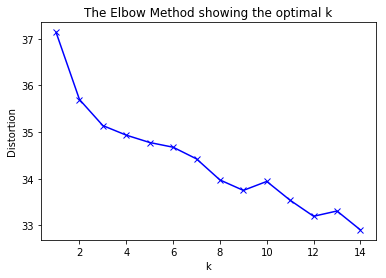

            0         1         2         3         4         5         6  \
0   -0.021816  0.131240  0.033469 -0.047828 -0.150265 -0.088226 -0.030151   
1   -0.112182 -0.158679  0.014607  0.052666  0.120177  0.341785  0.463093   
2   -0.168154  0.054907  0.146847 -0.010684  0.115865 -0.064730 -0.046186   
3   -0.030694 -0.071102 -0.102279  0.001068 -0.047041  0.001092 -0.008576   
4    0.044902 -0.219865  4.067788 -0.012444  0.135931  0.178045 -0.134018   
5   -0.132156  0.206886 -0.063389  0.041575  0.305899 -0.098288 -0.155908   
6    2.942678  0.021594  0.198969  0.017249  0.160393  0.314581  0.057742   
7    0.033917  0.163882  0.020024 -0.089400 -0.192538  0.100621 -0.159839   
8    4.104668 -0.196735 -0.173144 -0.159584  0.220676 -0.425757 -0.335278   
9   -0.094744  0.093225  0.126951  0.027456  0.140707  0.155237  0.139023   
10  -0.018245  0.133833  0.086849  0.034514  0.047633 -0.032719 -0.009281   
11  -0.040244 -0.220317 -0.259866 -0.030436  0.068692 -0.105683  0.006610   

In [25]:

ratings=pd.read_csv("ratings_small.csv")
#print(ratings.head())
R=ratings.pivot(index="userId",columns="movieId",values="rating").fillna(0)
print(R.shape)
#print(R.isnull().sum())
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R, k = 500)
print(U.shape,sigma.shape,Vt.shape)
B=U.dot(np.diag(sigma).dot(Vt))
B=np.matrix(np.array(B))
D=pd.DataFrame(B)

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(B)
    kmeanModel.fit(B)
    distortions.append(sum(np.min(cdist(B, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / B.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

kmeans = KMeans(n_clusters=5)
kmeans.fit(B)
D['cluster'] = kmeans.labels_
print(D)


In [2]:
#from surprise import Reader, Dataset
#from surprise import SVD, evaluate
#reader=Reader()
#ata = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#ata.split(n_folds=5)
#svd = SVD()
#evaluate(svd, data, measures=['RMSE', 'MAE'])
#For movie id 302,user id 1,actual rating 4 
#print(svd.predict(1,302,4))
